# **Projet IA pour `HumanForYou`**

<div>
<img src="cesi_logo2.png" width="150"/>
</div>

|Auteurs|Promo|Date|
|---|---|---|
|LANDEMARRE Hadrien, PETRO Tayana, SEURIN Alexis|FISE INFO A4 Nanterre|16/03/2023|



## **Introduction**

L’entreprise indienne de produits pharmaceutiques *HumanForYou* a constaté qu’environ **15 % de ses employés quittent l’entreprise chaque année**. Il s’agit d’une **vague de turn-over récurrente** qui doit être résolue et ne plus être aussi importante.

La direction de cette entreprise a identifié des conséquences directes suite à ce turn-over. Elle souligne notamment des projets qui prennent dorénavant du retard suite aux départs des employés, ce qui nuit à sa réputation auprès de ses clients et de ses partenaires commerciaux.

De plus, l’arrivée de nouveaux employés ont besoin de temps pour être formés et être opérationnels. 

Grâce à notre expertise en tant que spécialistes de l’analyse de données, la direction de l’entreprise a besoin de notre équipe pour **déterminer les facteurs ayant le plus d’influence sur ce taux de turn-over** et de **proposer des modèles** qui permettraient d’avoir des pistes d’amélioration pour donner à leurs employés l’envie de rester.

La problématique que nous traiterons dans ce rapport est la suivante :  **Comment réduire le taux de « turn-over » et améliorer la fidélité des employés à leur entreprise ?**

Pour y répondre, nous allons passer par différentes étapes majeures mettant en évidence notre démarche pouvant aboutir au résultat souhaité.

#### ***Un turn-over élevé a un impact significatif sur la cohésion et le climat social de l’entreprise. Nous cherchons à comprendre les raisons de ce turn-over élevé permet d’envisager les actions correctives. L’intelligence artificielle permet donc de fournir des informations en temps réel, d’identifier les causes des démissions passées et à venir et d’anticiper la prise de décisions.***

### Objectifs

Dans le cadre de ce Notebook, nous allons suivre les étapes suivantes :

- la génération de votre/vos jeux de données en justifiant les choix et les traitements effectués pour faire face aux problématiques classiques de ce type de travail.

- le choix d'un ou de plusieurs algorithmes d'IA retenu(s).

- l'analyse des résultats obtenus et leur interprétation en s'appuyant sur des métriques.

- La démarche mise en œuvre pour améliorer un modèle.

- le choix du modèle retenu au final parmi les différents essais effectués en justifiant pas rapport au besoin de votre client et des métriques.

- vos propositions finales justifiées

### Mesure de performance

Elle n'interviendra que dans le notebook suivant, celà dit, il convient d'avoir une idée des objectifs dès le début de projet. 

On s'intéressera à terme à la minimisation de la [_root mean square error (RMSE)_](https://en.wikipedia.org/wiki/Root-mean-square_deviation) et/ou de à la [_mean absolute error (MAE)_](https://en.wikipedia.org/wiki/Mean_absolute_error) de notre modèle :

$$
\newcommand\x{\mathbf{x}}
\newcommand\X{\mathbf{X}}
\newcommand\y{\mathbf{y}}
\newcommand\Y{\mathbf{Y}}
\newcommand\RMSE{\mbox{RMSE}}
\newcommand\MAE{\mbox{MAE}}
$$
$$
\RMSE(\X,h)=\sqrt{\frac{1}{m}\sum_{i=1}^{m}{(h(\x^{(i)})-y^{(i)})^2}}
$$

$$
\MAE(\X,h)=\frac{\sum_{i=1}^{m}{\lvert h(\x^{(i)})-y^{(i)})\rvert}}{m}
$$

$h$ étant la fonction de prédiction du modèle.


### Préparation de l'environnement

Ci-dessous quelques imports et précautions préalables à notre travail. Il n'est pas inutile de les parcourir.
Si nécessaire créer un bloc au démarrage pour installer toutes les librairies nécessaires en exécutant chacune leur tour les commandes suivantes:

In [28]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [31]:
# imports
import numpy as np
import os
from numpy.random import default_rng

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# stabilité du notebook d'une exécution à l'autre
random=default_rng(42) 

# Figures dans le notebook
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Localisation du lieu de sauvegarde des figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "workflowDS"
IMAGES_PATH = (PROJECT_ROOT_DIR, "IA", CHAPTER_ID) # le dossier doit exister


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## **1. Préparation des données**

Il convient d'automatiser l'import des données.

In [32]:
#Permet de créer le dossier qui va grouper les différents fichiers (à améliorer) 
import os

GENERAL_DATA_PATH = os.path.join("datasets", "general_data")

if not os.path.isdir(GENERAL_DATA_PATH):
    os.makedirs(GENERAL_DATA_PATH)
    

### Chargement des données en mémoire

De même, on va créer une fonction utilisant [`pandas`](https://pandas.pydata.org/) qui charge les données en mémoire dans un [`Pandas DataFrame`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame).

In [33]:
# Permet de mettre les fichiers dans des variables puis dans des DataFrame 
import pandas as pd

general_data = pd.read_csv("datasets/general_data/general_data.csv")
employee_survey_data = pd.read_csv("datasets/general_data/employee_survey_data.csv")
manager_survey_data = pd.read_csv("datasets/general_data/manager_survey_data.csv")
in_time_data = pd.read_csv("datasets/general_data/in_out_time/in_time.csv")
out_time_data = pd.read_csv("datasets/general_data/in_out_time/out_time.csv")

Df_general_data = pd.DataFrame(general_data)
Df_employee_survey_data = pd.DataFrame(employee_survey_data)
Df_manager_survey_data = pd.DataFrame(manager_survey_data)
Df_in_time_data = pd.DataFrame(in_time_data)
Df_out_time_data = pd.DataFrame(out_time_data)

In [34]:
# Permet de remplacer les données manquantes dans in_out_time par des 0
Df_in_time_data.fillna(0, inplace = True)
Df_out_time_data.fillna(0, inplace = True)


Df_in_time_data.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,0.0,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,0,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,0.0,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,0.0,2015-01-02 10:15:44,2015-01-05 10:21:05,0,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,0,0.0,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,0.0,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,0.0,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,0.0,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,0.0,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,0.0,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,0.0,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [35]:
#Copy of both dataframe
Df_in_time_dataCpy = Df_in_time_data.copy()
Df_out_time_dataCpy = Df_out_time_data.copy()
#Convert the time text into time
for k in range(1,len(Df_in_time_dataCpy.columns)):
    Df_in_time_dataCpy[Df_in_time_dataCpy.columns[k]] = pd.to_datetime(Df_in_time_dataCpy[Df_in_time_dataCpy.columns[k]], format='%Y-%m-%d %H:%M:%S')
for k in range(1,len(Df_out_time_dataCpy.columns)):
    Df_out_time_dataCpy[Df_out_time_dataCpy.columns[k]] = pd.to_datetime(Df_out_time_dataCpy[Df_out_time_dataCpy.columns[k]], format='%Y-%m-%d %H:%M:%S')



Df_in_time_dataCpy.head(5)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,1970-01-01,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,1970-01-01 00:00:00,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,1970-01-01,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,1970-01-01,2015-01-02 10:15:44,2015-01-05 10:21:05,1970-01-01 00:00:00,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,1970-01-01 00:00:00,1970-01-01,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,1970-01-01,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,1970-01-01,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,1970-01-01,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,1970-01-01,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,1970-01-01,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,1970-01-01,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [36]:
# Soustraction des dataframes in_time_dataCpy et out_time_dataCpy
Df_time_data = Df_out_time_dataCpy.subtract(Df_in_time_dataCpy)

## Suppression de Unnamed 
Df_time_data = Df_time_data.drop("Unnamed: 0", axis=1)
Df_time_data.head(5)

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0 days,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0 days,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,0 days,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,0 days,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


In [37]:
## remplacement des données 0 days en nan 
Df_time_data = Df_time_data.replace('0 days', np.nan)

## Moyenne des différentes lignes
mean_time_data = Df_time_data.mean(axis=1)

## ajout de EmployeeID et de modification de la valeur meanWorkingTime
meanWorkingTime = pd.DataFrame({'EmployeeID':mean_time_data.index+1,'MeanWorkingTime':mean_time_data.values})
meanWorkingTime['MeanWorkingTime']=meanWorkingTime['MeanWorkingTime']/np.timedelta64(1, 'h')

meanWorkingTime.head(5)

,EmployeeID,MeanWorkingTime
0,1,7.373651
1,2,7.718969
2,3,7.013240
3,4,7.193678
4,5,8.006175


In [38]:

# Permet rassembler les différents dataframes en un seul dataframe 
Merged_data = pd.merge(Df_general_data, Df_employee_survey_data)
Merged_data = pd.merge(Merged_data, Df_manager_survey_data)
Merged_data = pd.merge(Merged_data, meanWorkingTime)



### Coup d'oeil

1. Observons les premières lignes de notre `DataFrame` avec la méthode [`head()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html?highlight=head):

In [39]:
#rendu des  différentes variables 
Merged_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,MeanWorkingTime
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3.0,4.0,2.0,3,3,7.373651
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,3.0,2.0,4.0,2,4,7.718969
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,2.0,2.0,1.0,3,3,7.013240
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,4.0,4.0,3.0,2,3,7.193678
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,4.0,1.0,3.0,3,3,8.006175


2. Utilisons maintenant [`info()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info) pour obtenir une description du jeu de données :

In [40]:
# Taille des jeux de données par colonne
Merged_data.info(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

3. La fonction [`value_count()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html?highlight=value_count) permet de connaître, par exemple, le nombre de valeurs différentes d'une [`Series`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) telle que `ocean_proximity`, qui semble être catégorielle:

In [41]:
## PAS IMPORTANT
print(Merged_data['NumCompaniesWorked'])
#Merged_data.value_counts('Age')

0       1.0
1       0.0
2       1.0
3       3.0
4       4.0
       ... 
4405    3.0
4406    2.0
4407    0.0
4408    0.0
4409    0.0
Name: NumCompaniesWorked, Length: 4410, dtype: float64


4. La méthode `describe()` permet enfin d'obtenir un résumé statistique des valeurs numériques :

In [42]:
#résumé statistique des valeurs numériques
Merged_data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,MeanWorkingTime
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,...,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741,7.700792
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,...,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742,1.340218
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.950504
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,6.673333
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.406761
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000,8.368703
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,11.030960


5. On peut utiliser la fonction [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) et [`matplotlib`](https://matplotlib.org/) pour afficher un histogramme par attribut numérique.

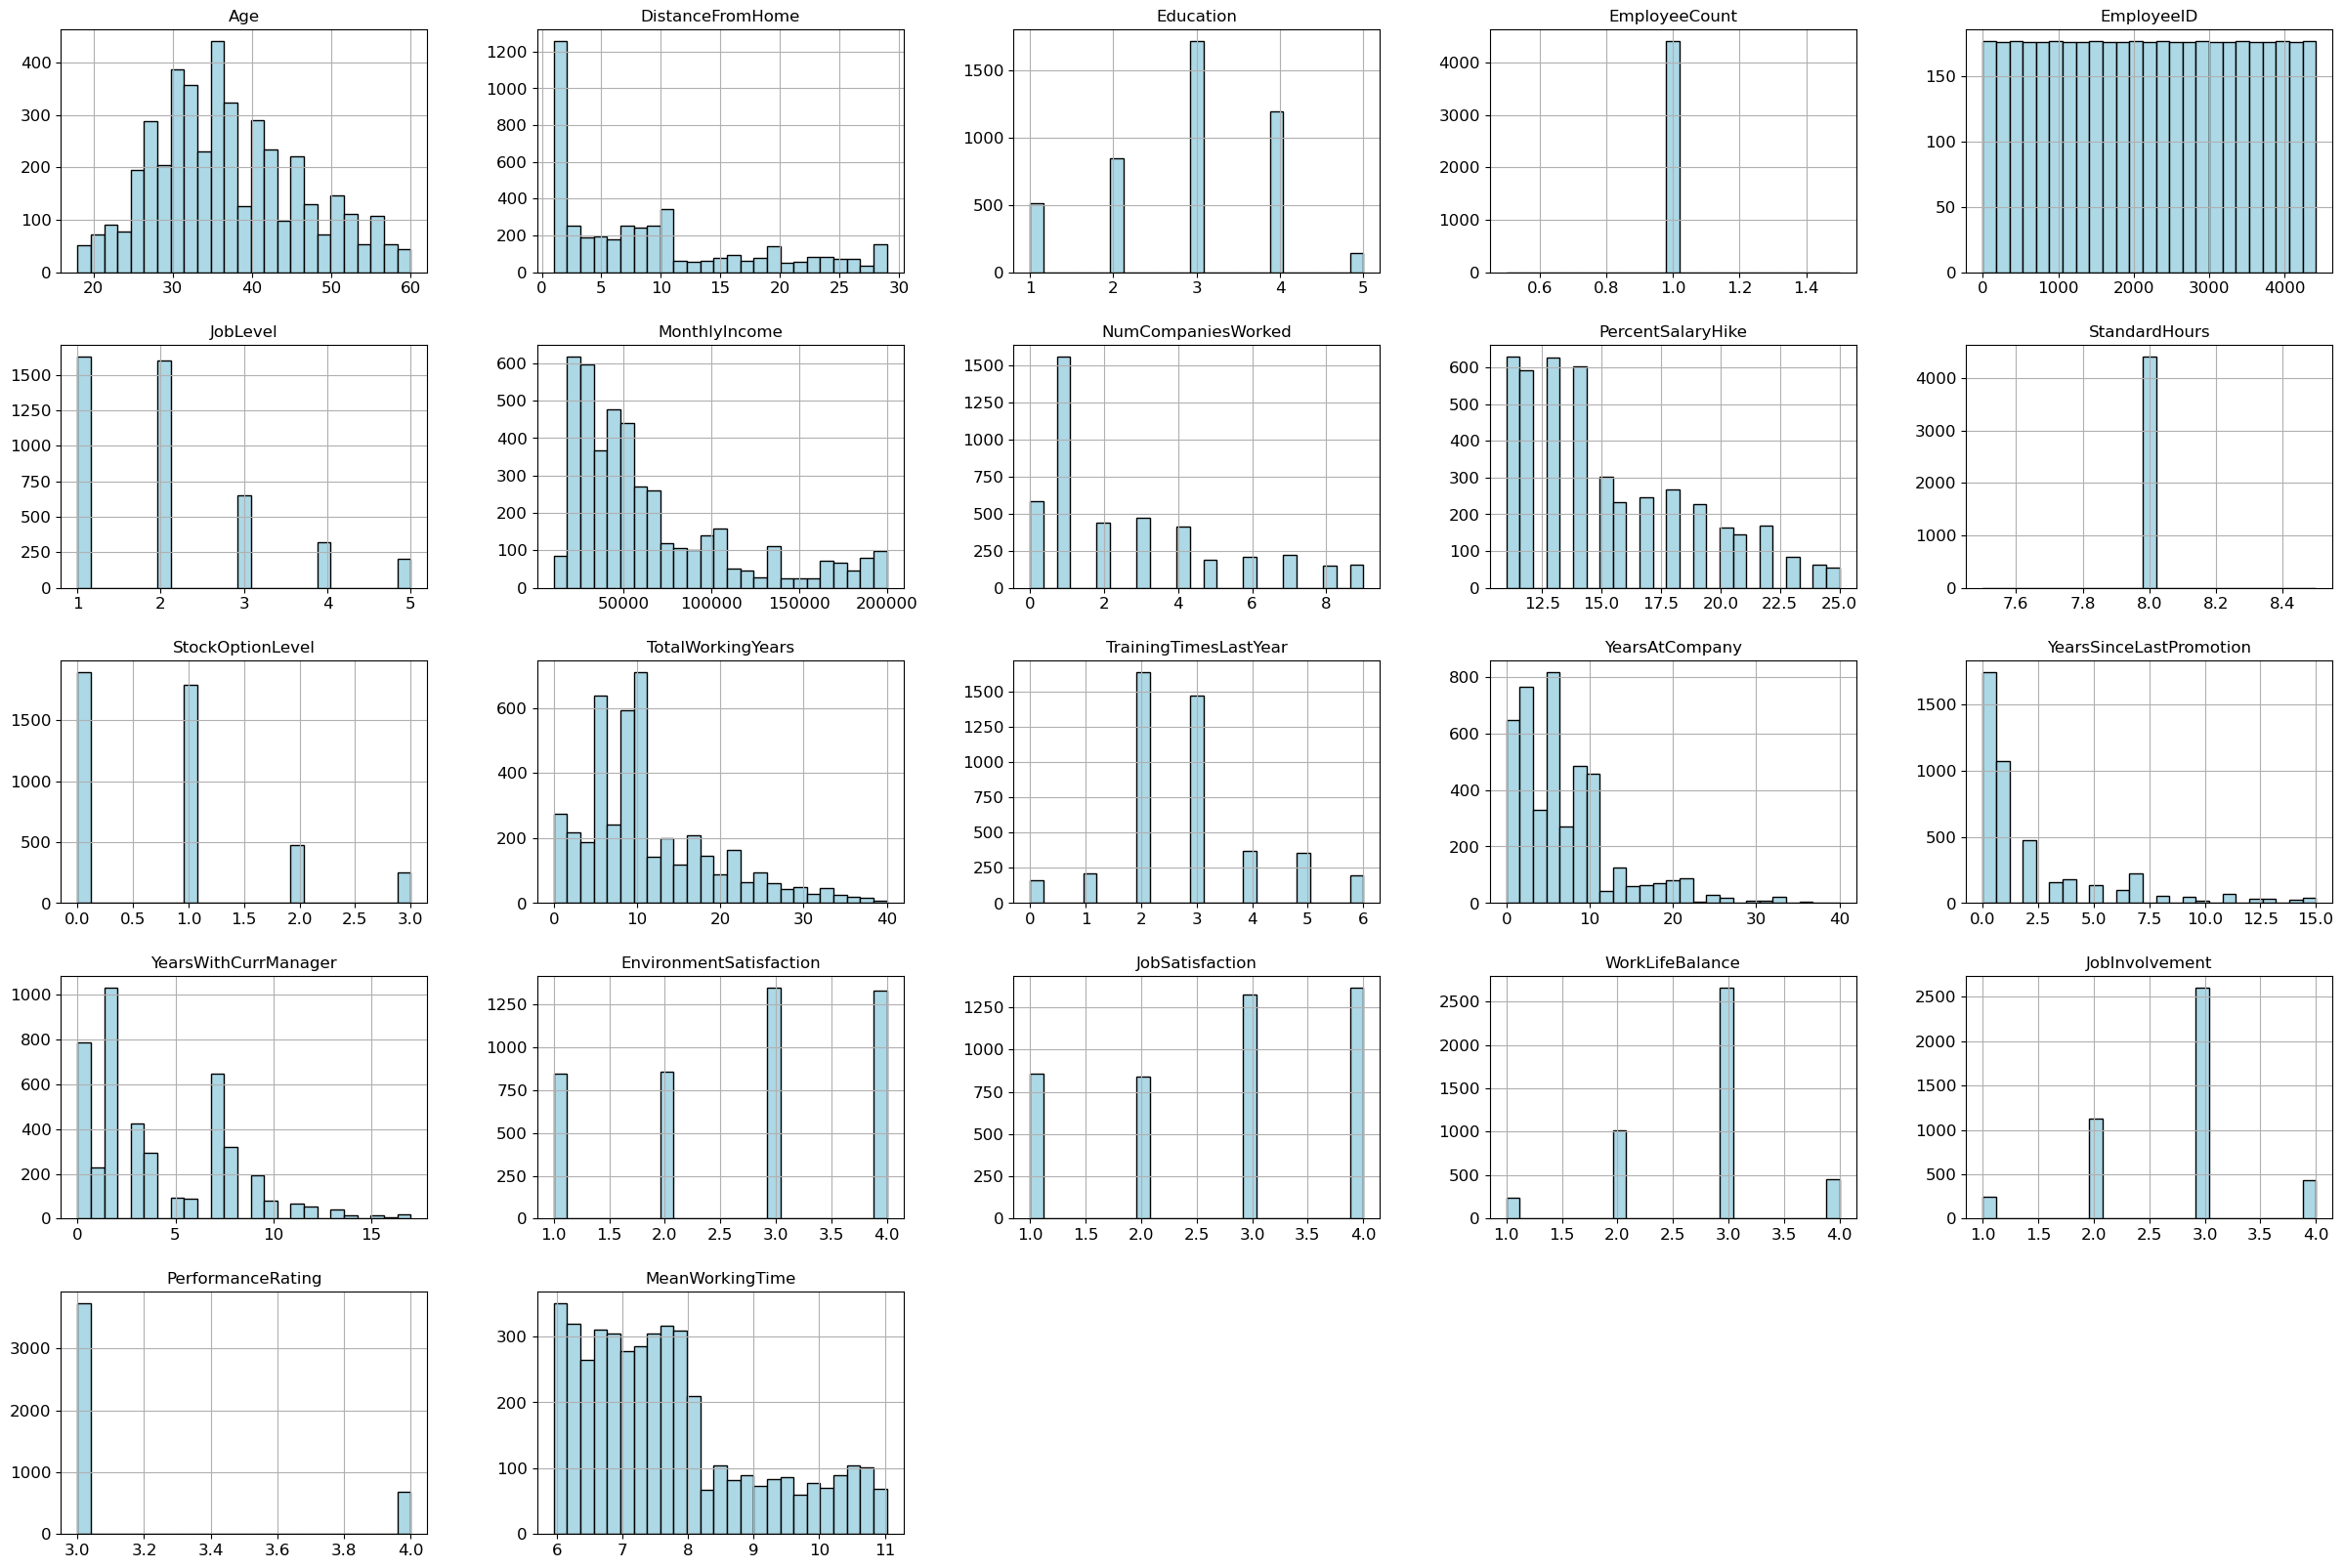

In [43]:
# Diagramme en fonction des différents tableaux 
Merged_data.hist(figsize=(30,20), bins=25, color = "lightblue", column=list(Merged_data.columns), ec="black")

plt.show()

## Pré-traitement des données

Analyse des données

#### Nettoyage des données et préparation des données 

In [44]:
from sklearn.preprocessing import OrdinalEncoder
Merged_dataCpy = Merged_data.copy()
merged_cat_quant = Merged_dataCpy[["Attrition", "BusinessTravel", "Department", "EducationField",  "JobRole", "MaritalStatus",
                                   "Gender"]]

ordinal_encoder = OrdinalEncoder()
merged_cat_encoded = ordinal_encoder.fit_transform(merged_cat_quant)
merged_cat_encoded = pd.DataFrame(merged_cat_encoded, columns=merged_cat_quant.columns.values)
merged_cat_encoded["EmployeeID"] = merged_cat_encoded.index+1
merged_cat_encoded[:10]

,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,Gender,EmployeeID
0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,1
1,1.0,1.0,1.0,1.0,6.0,2.0,0.0,2
2,0.0,1.0,1.0,4.0,7.0,1.0,1.0,3
3,0.0,0.0,1.0,1.0,1.0,1.0,1.0,4
4,0.0,2.0,1.0,3.0,7.0,2.0,1.0,5
5,0.0,2.0,1.0,1.0,5.0,1.0,0.0,6
6,1.0,2.0,1.0,3.0,7.0,2.0,1.0,7
7,0.0,2.0,1.0,1.0,7.0,1.0,1.0,8
8,0.0,2.0,1.0,1.0,2.0,1.0,1.0,9
9,0.0,0.0,1.0,3.0,2.0,0.0,0.0,10


In [45]:
Merged_dataCpy.update(merged_cat_encoded)
Merged_dataCpy.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,MeanWorkingTime
0,51,0.0,2.0,2.0,6,2,1.0,1,1,0.0,...,6,1,0,0,3.0,4.0,2.0,3,3,7.373651
1,31,1.0,1.0,1.0,10,1,1.0,1,2,0.0,...,3,5,1,4,3.0,2.0,4.0,2,4,7.718969
2,32,0.0,1.0,1.0,17,4,4.0,1,3,1.0,...,2,5,0,3,2.0,2.0,1.0,3,3,7.013240
3,38,0.0,0.0,1.0,2,5,1.0,1,4,1.0,...,5,8,7,5,4.0,4.0,3.0,2,3,7.193678
4,32,0.0,2.0,1.0,10,1,3.0,1,5,1.0,...,2,6,0,4,4.0,1.0,3.0,3,3,8.006175


## KNN

remplir les valeurs manquante

In [46]:
from sklearn.impute import KNNImputer
#instanciation et définition du k
knn = Merged_data[['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance']]
#for column in
column_headers = list(knn.columns.values)
imputer = KNNImputer(n_neighbors=5,missing_values=np.nan)
imputer.fit_transform(knn)
sample_incomplete_rows = pd.DataFrame(imputer.fit_transform(knn), columns=column_headers)
sample_incomplete_rows.head(5)

,NumCompaniesWorked,TotalWorkingYears,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1.0,1.0,3.0,4.0,2.0
1,0.0,6.0,3.0,2.0,4.0
2,1.0,5.0,2.0,2.0,1.0
3,3.0,13.0,4.0,4.0,3.0
4,4.0,9.0,4.0,1.0,3.0


In [47]:
Merged_dataCpy.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
MeanWorkingTime             0
dtype: int64

Nous allons dans cette partie visualiser les variables qui pourrait nous intéresser.

In [31]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


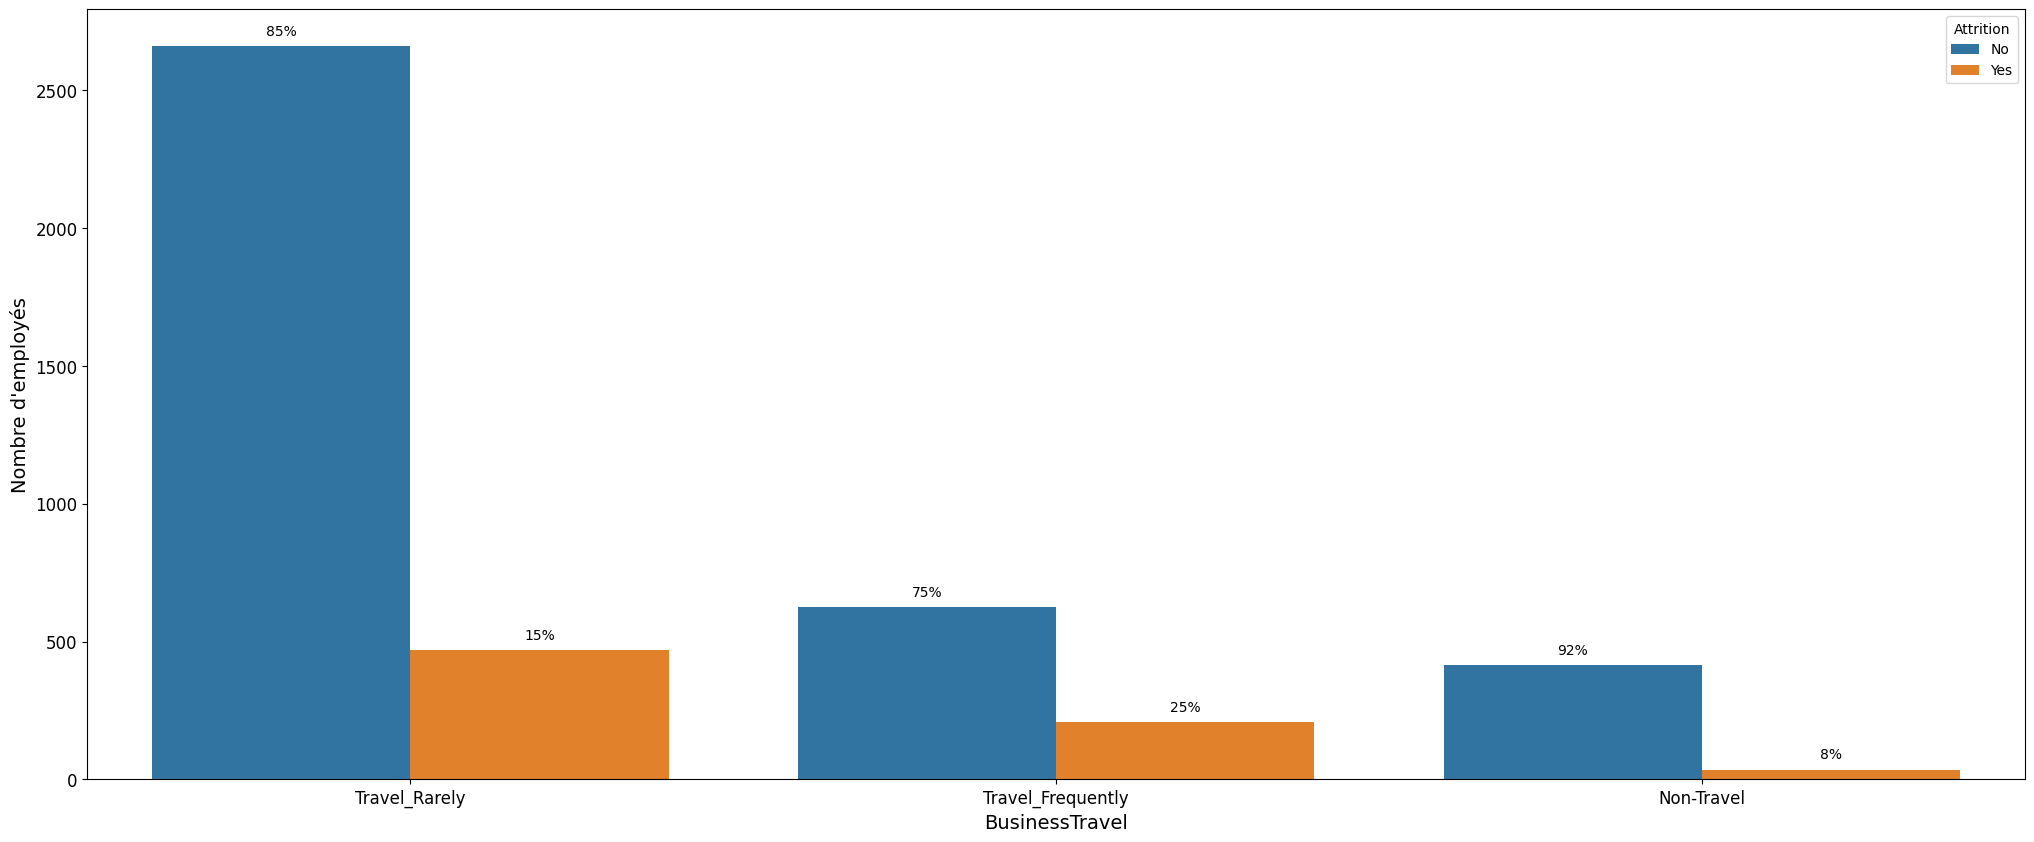

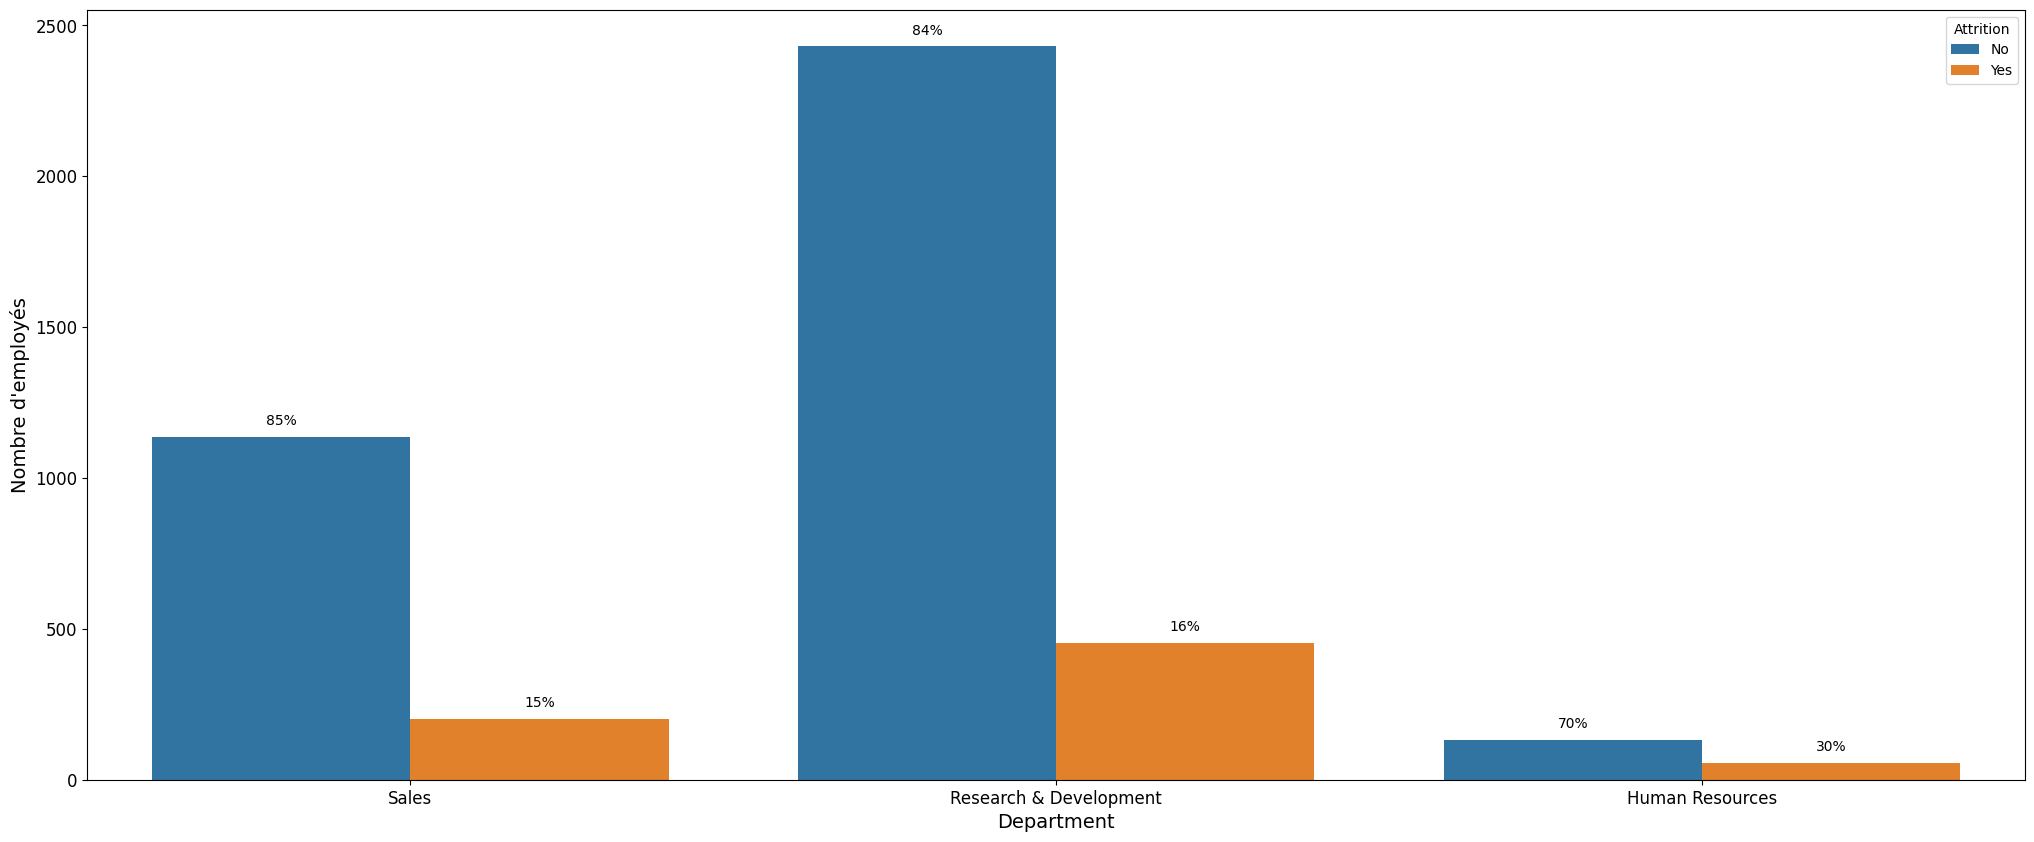

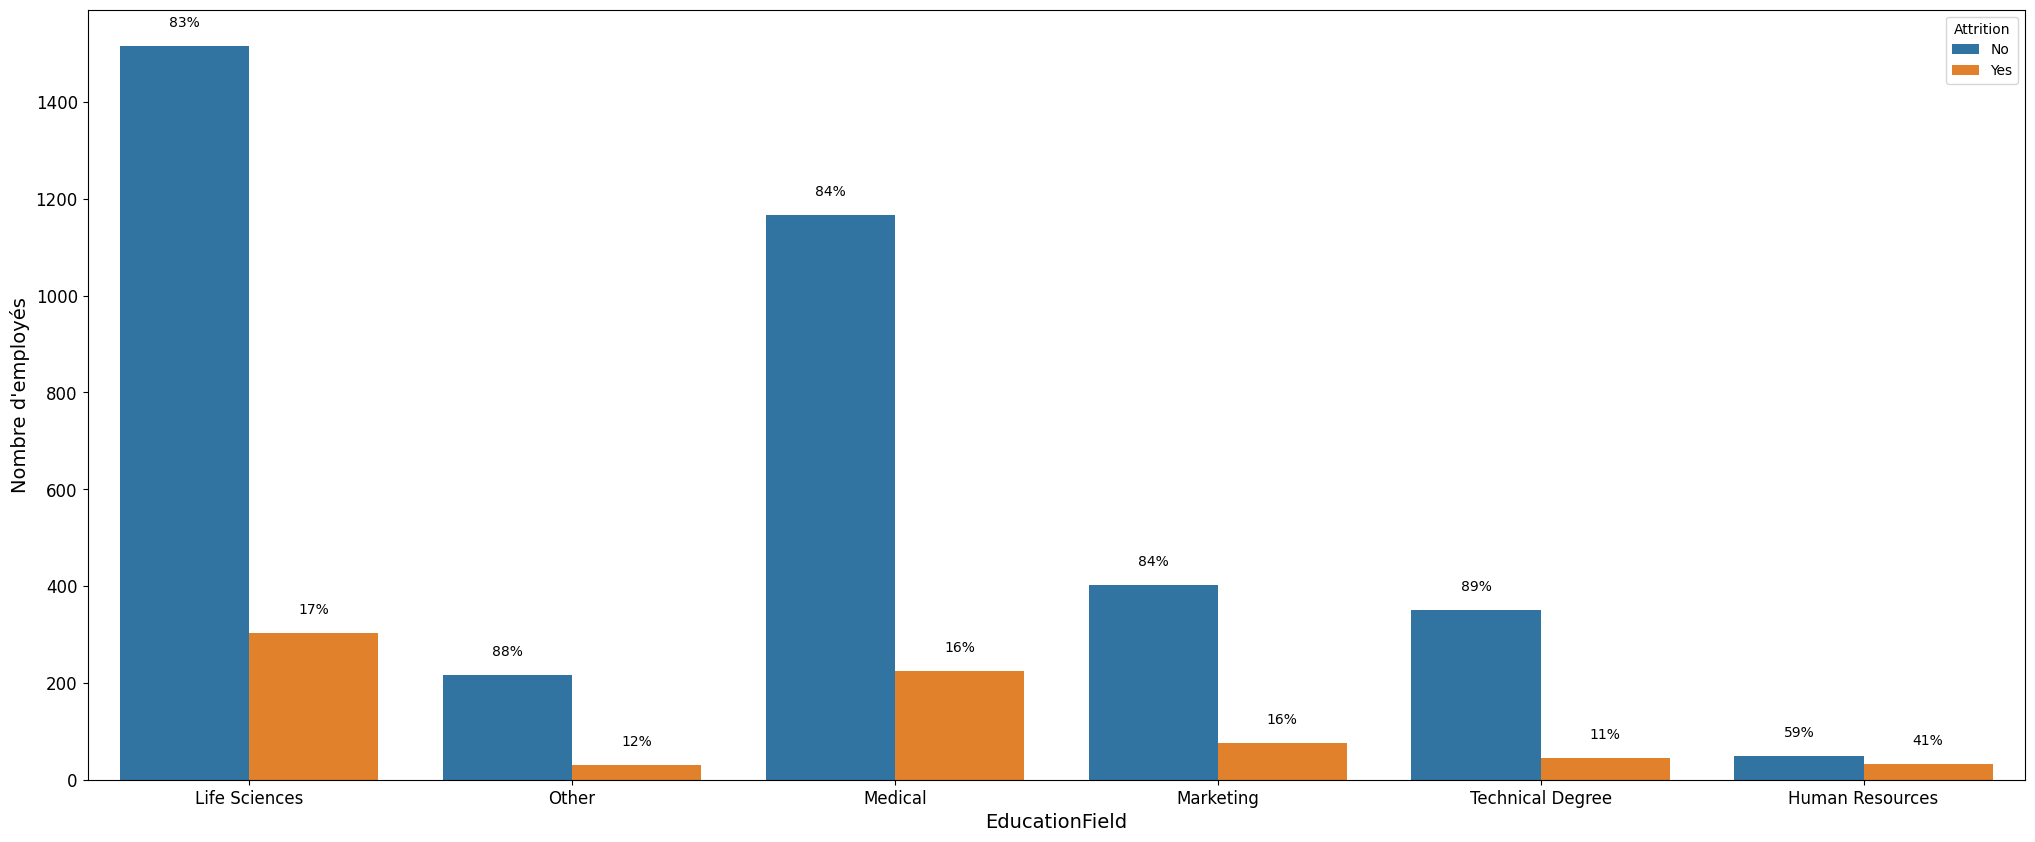

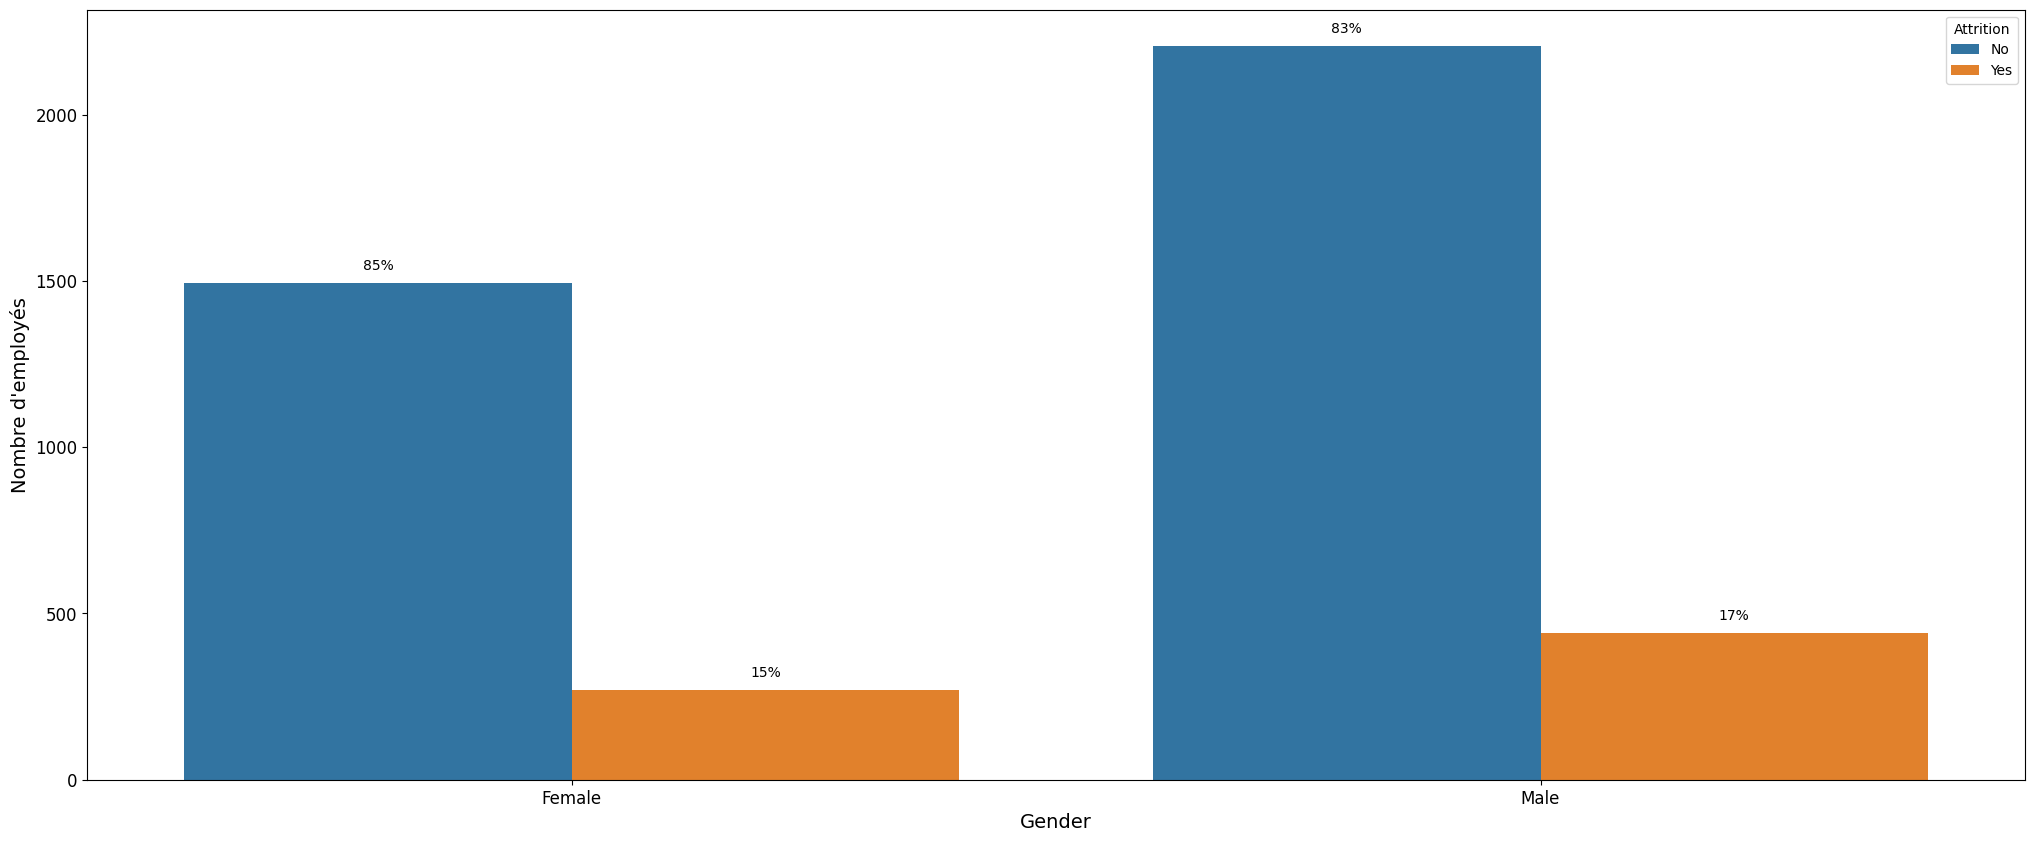

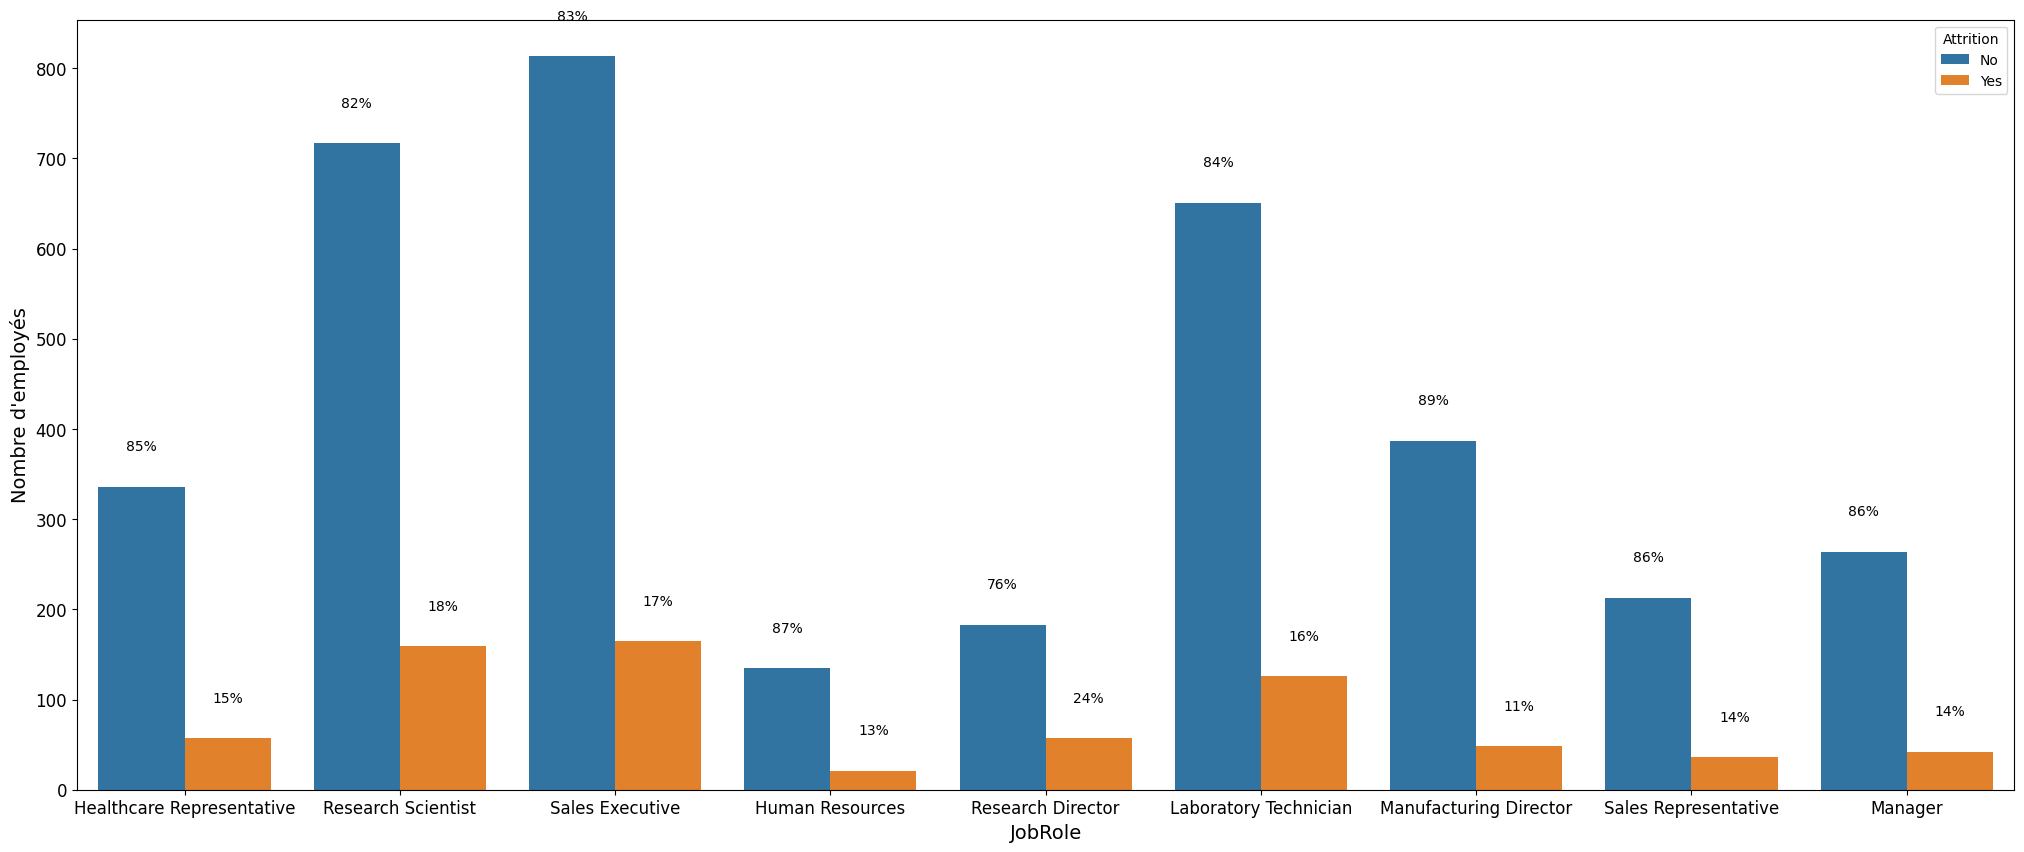

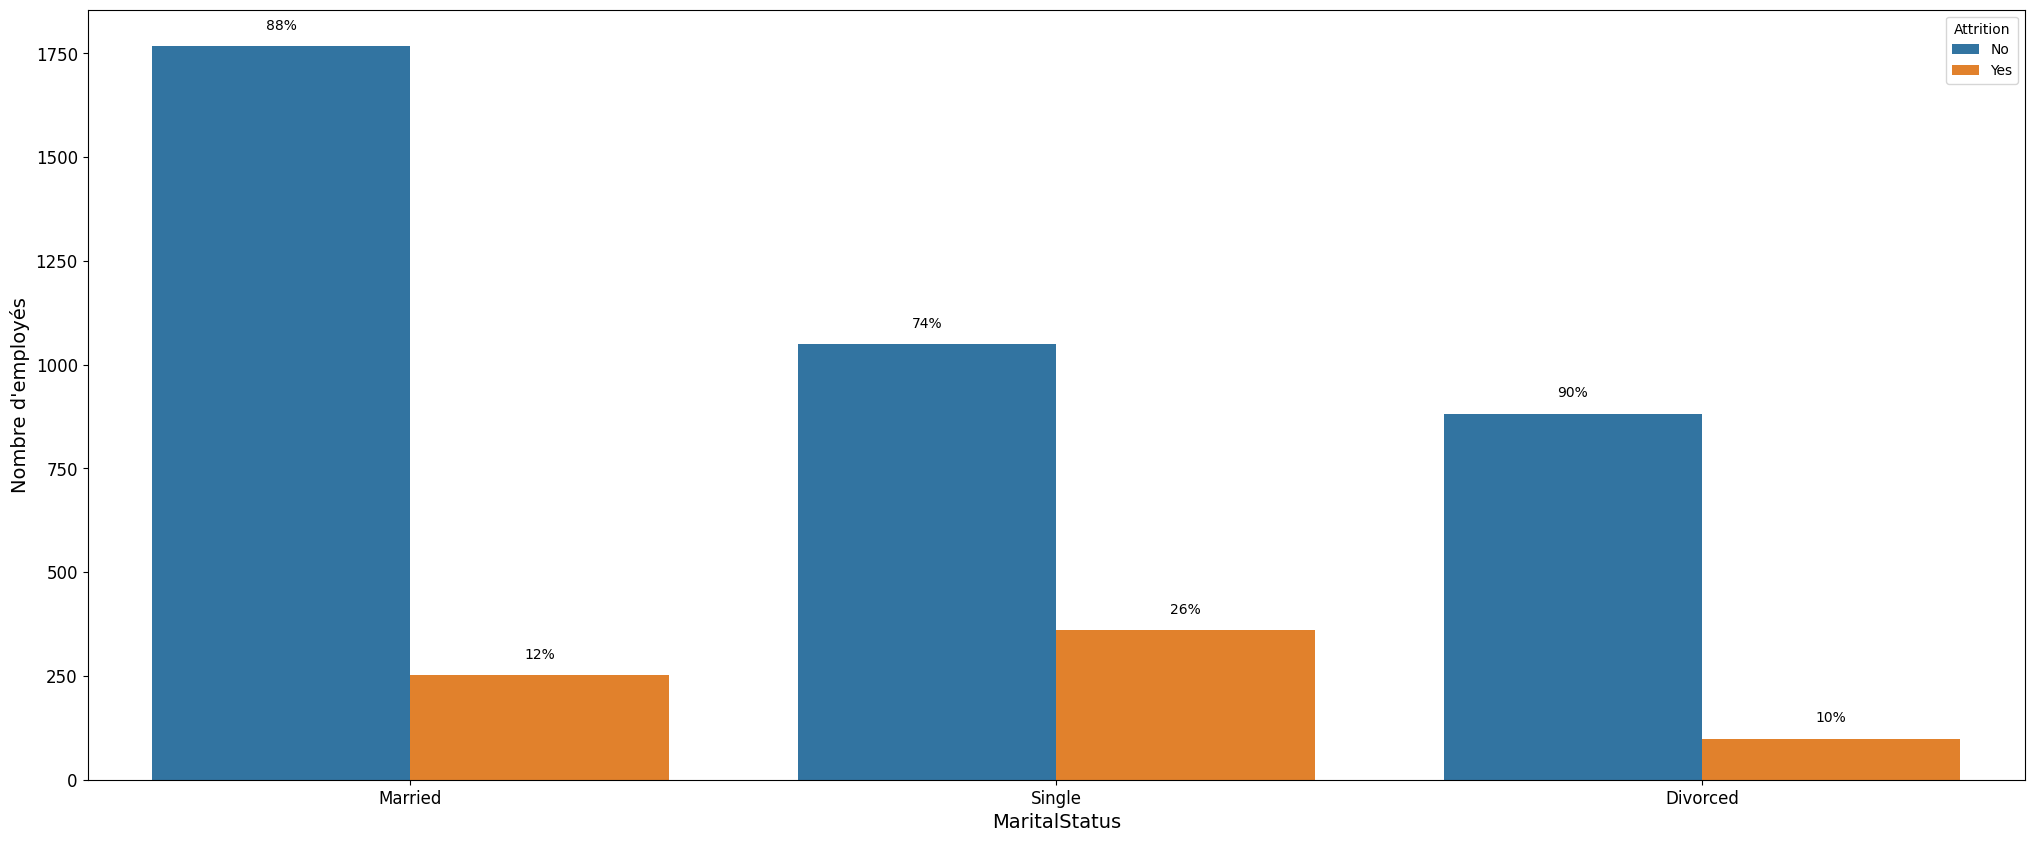

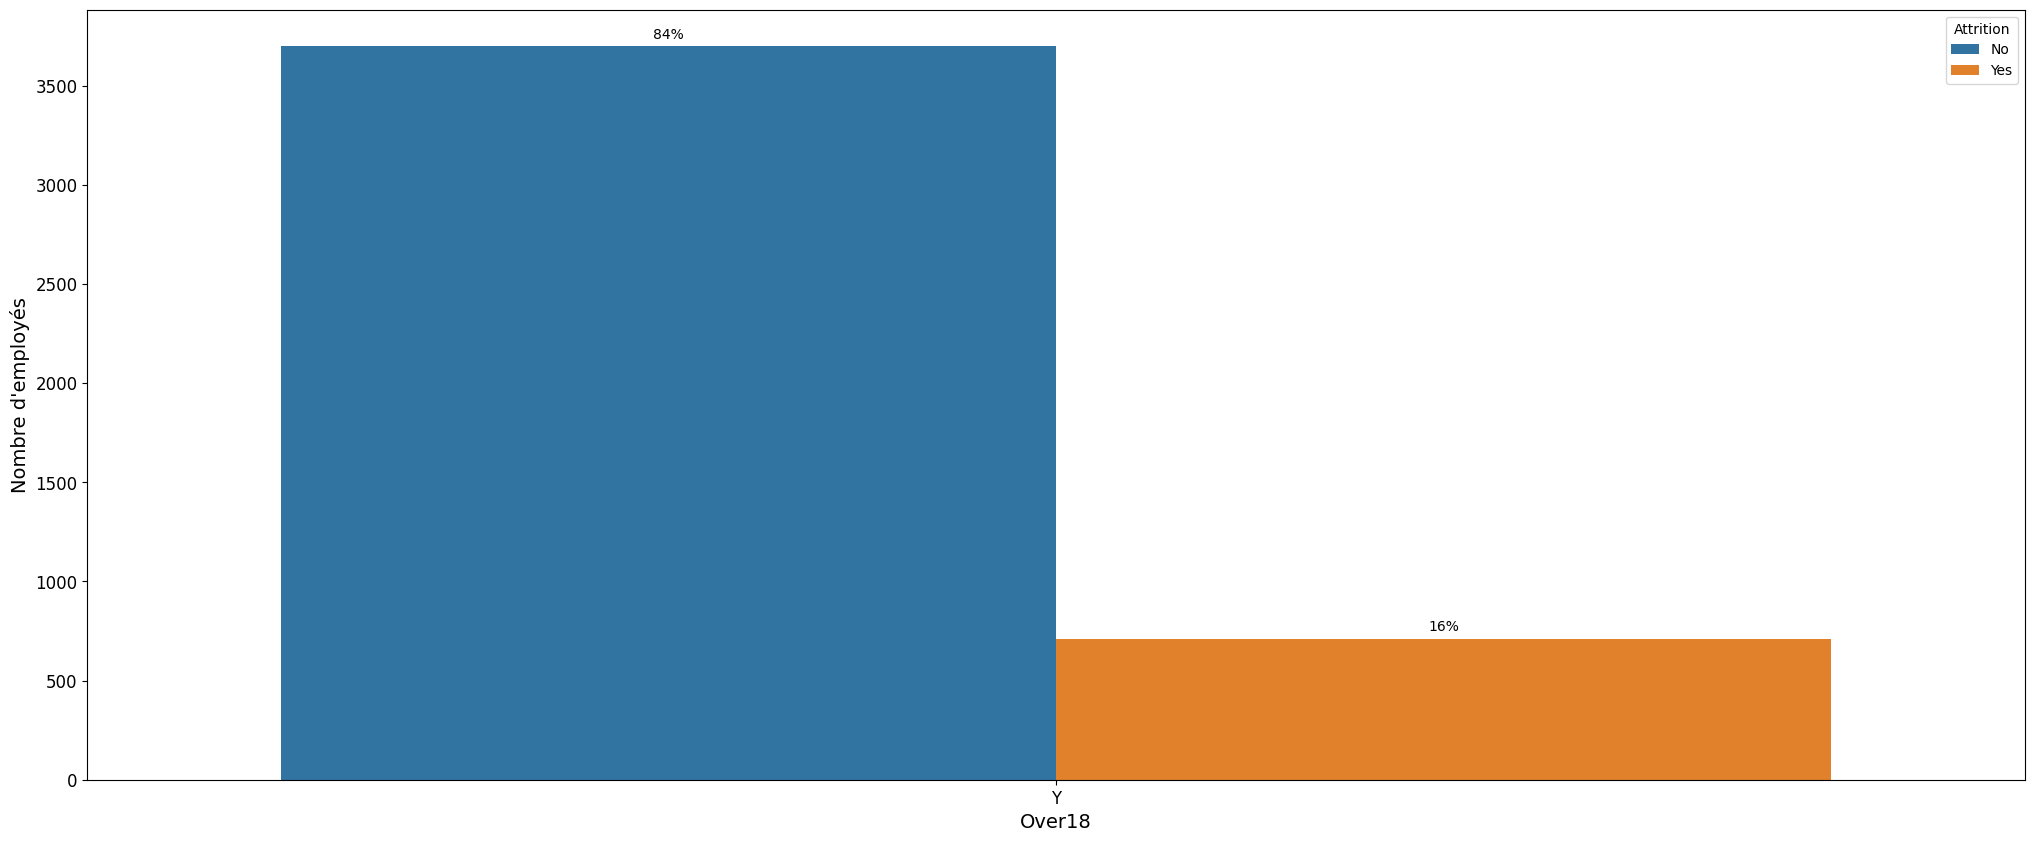

In [32]:
import seaborn as sns

for name_column in Merged_data.select_dtypes(include=['object']).columns:
    if (name_column != "Attrition"):
        plt.figure(figsize=(25,10))
        ax = sns.countplot(x=name_column, data=Merged_data, hue="Attrition")

        ax.set_ylabel('Nombre d\'employés')
        bars = ax.patches
        half = int(len(bars)/2)
        left_bars = bars[:half]
        right_bars = bars[half:]

        for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r

            ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
            ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

Les boîtes à moustaches

*Une boîte à moustaches montre la distribution des données pour une variable continue.*
Elle permet de vérifier la normalité et d'identifier des points qui peuvent être des valeurs aberrantes. 

La ligne centrale est la médiane des données
La moitié des données est supérieure à cette valeur et l'autre moitié est inférieure.
De plus, le bas et le haut de la boîte sont les deux quantiles, appelés quartiles, car chacun coupe un quart des données. 

C:\Users\AS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\plotting\_matplotlib\tools.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


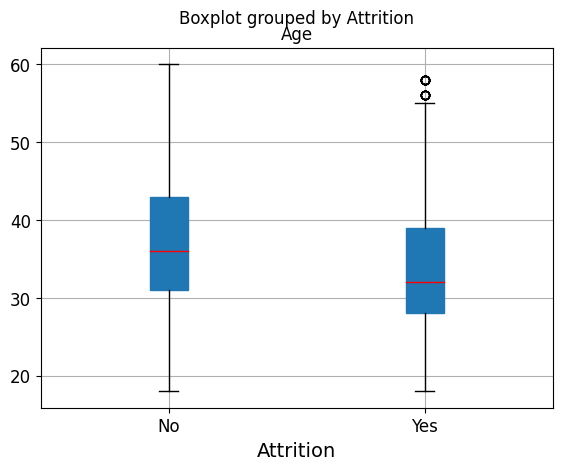

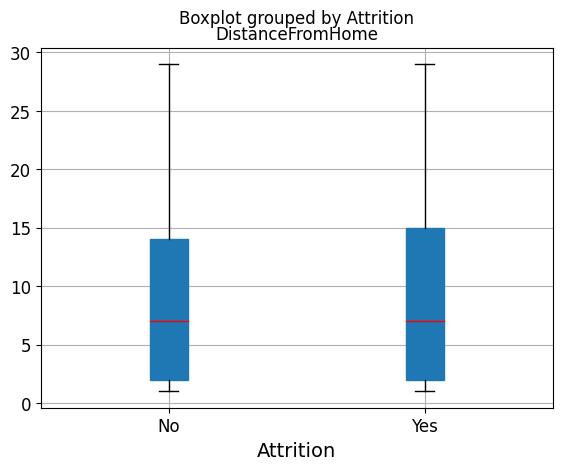

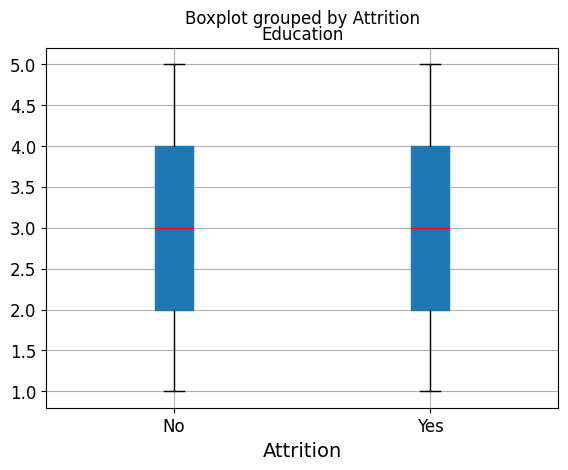

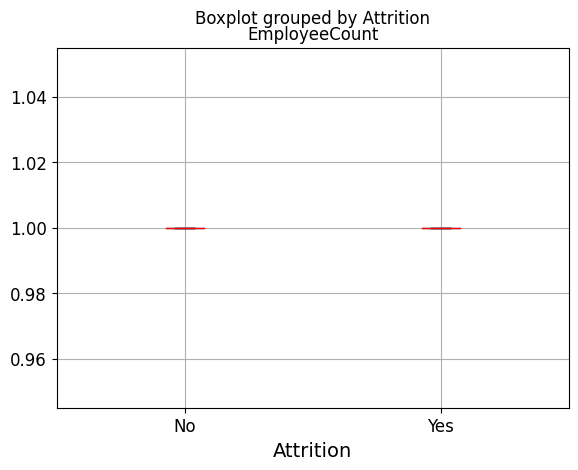

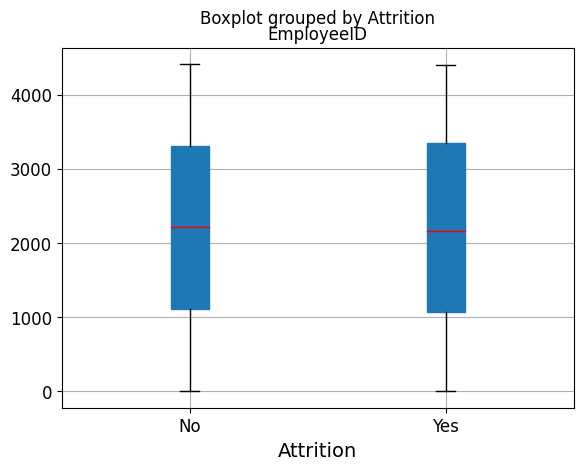

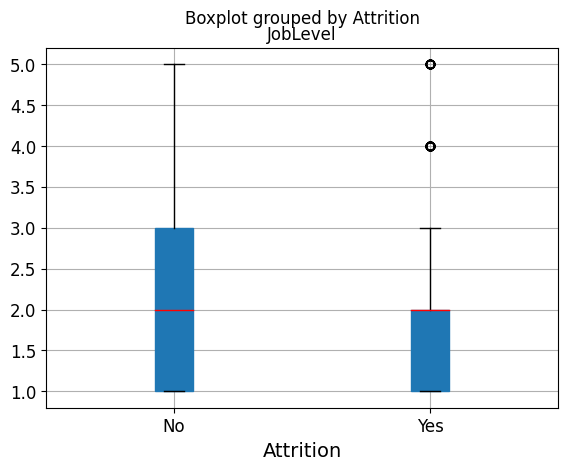

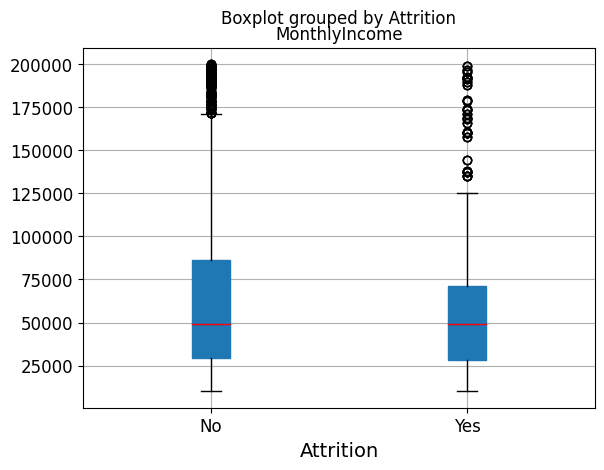

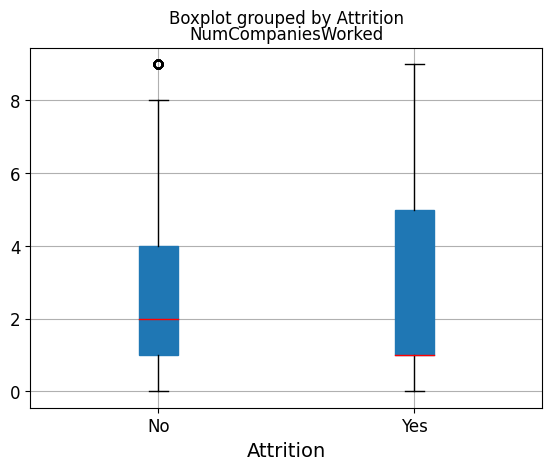

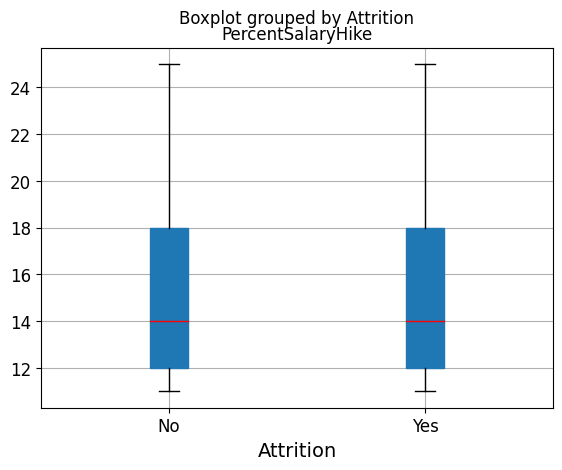

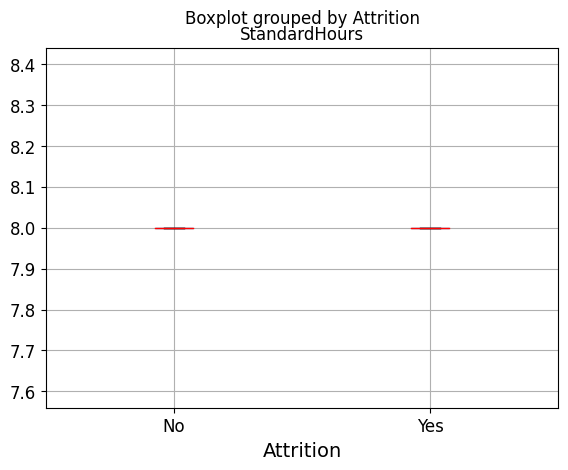

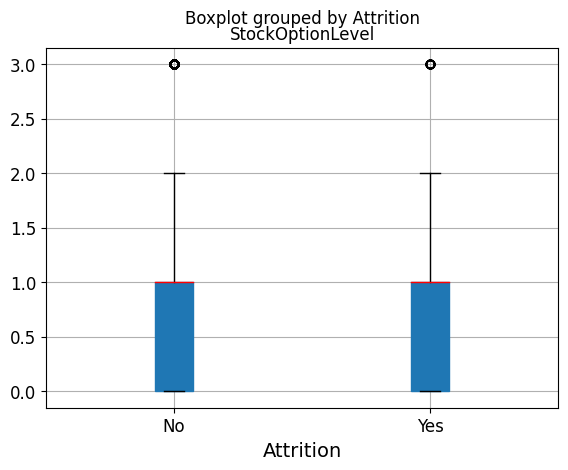

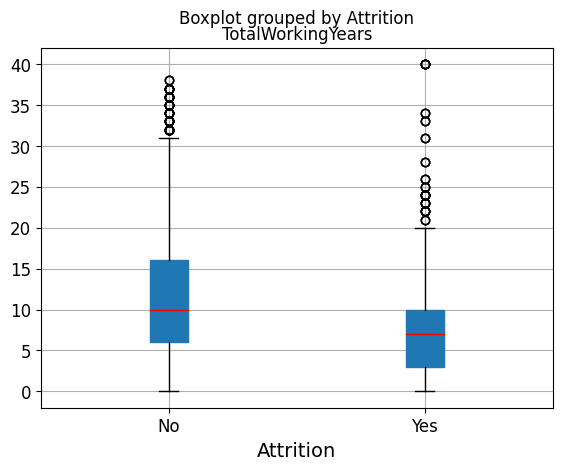

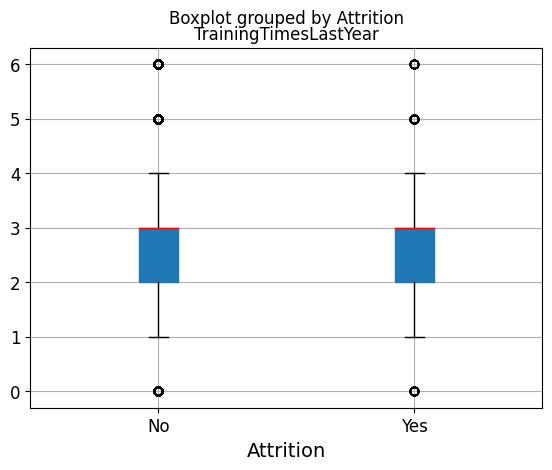

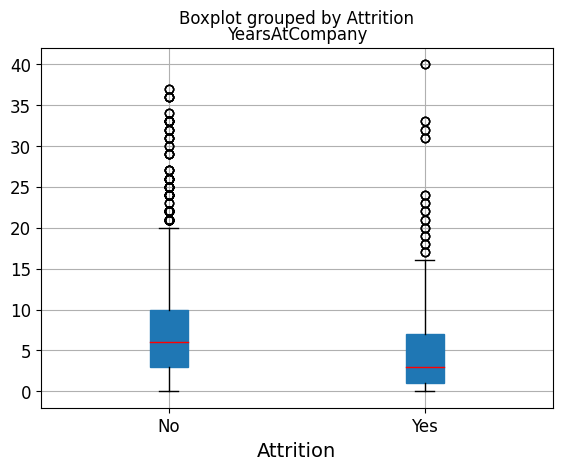

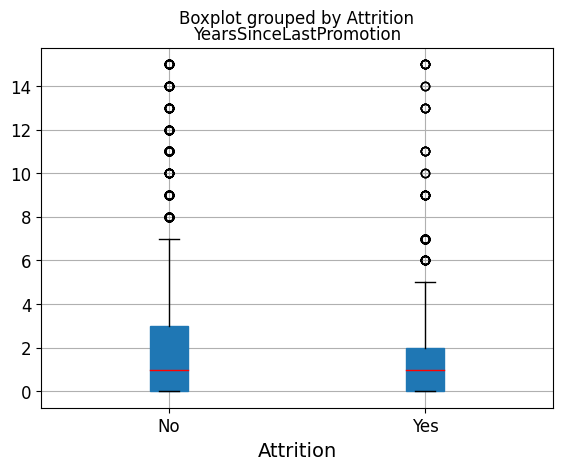

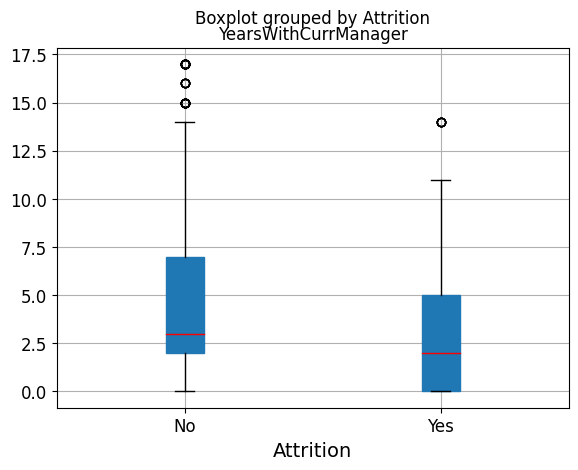

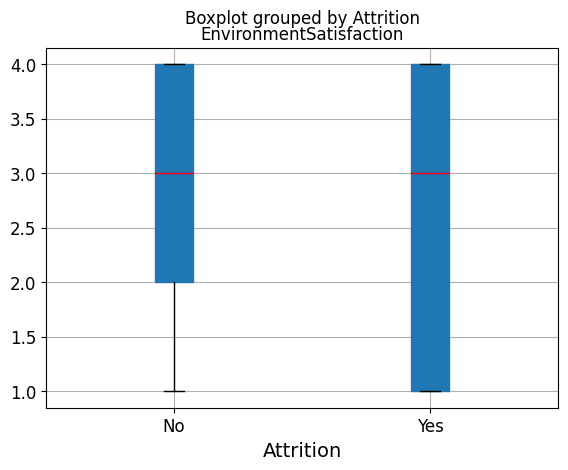

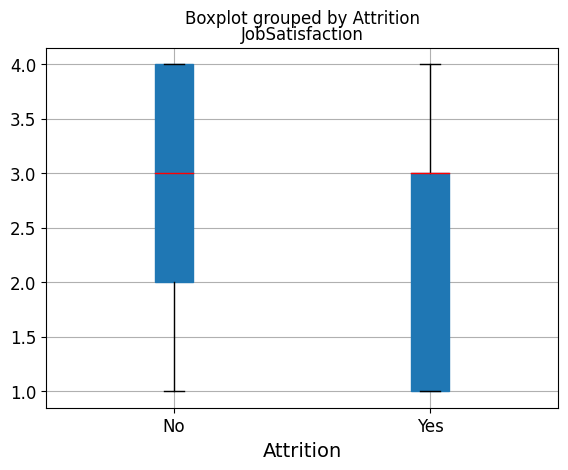

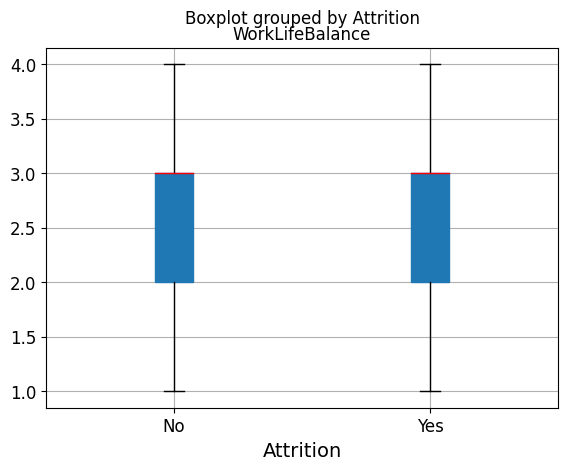

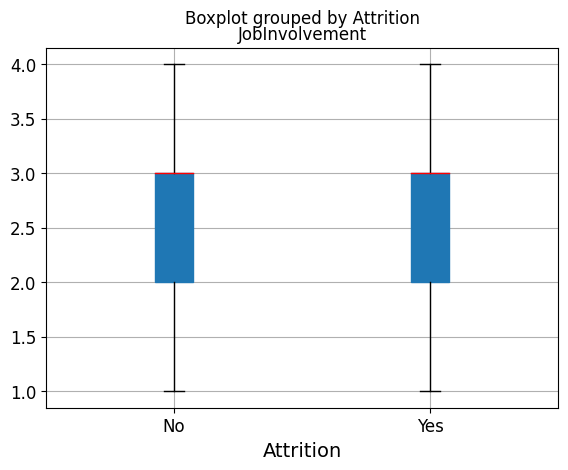

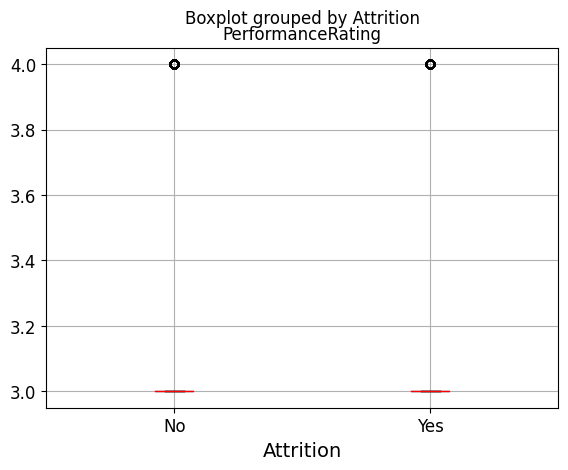

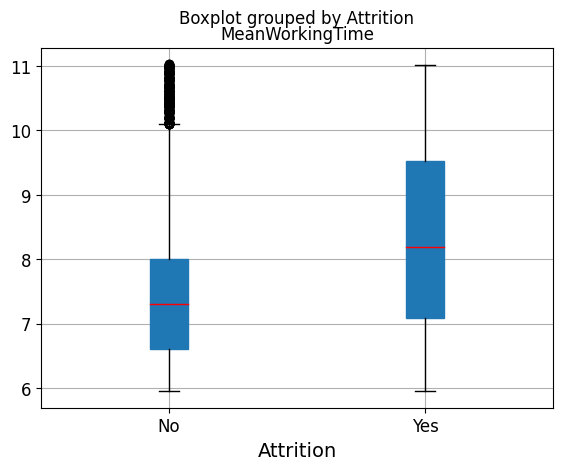

In [37]:
for name_column in Merged_data.select_dtypes(np.number).columns:
    props = dict(whiskers="black", medians="red", caps="black")
    Merged_data.boxplot(by='Attrition', color=props, patch_artist=True, column = name_column, grid = True, figsize=None) 
    
    plt.suptitle("")

    dest = os.path.join(path, figname)
        plt.savefig(dest)  # write image to file
        plt.clf()

    

Nous allons tout d'abord remplacer les valeurs manquantes par des zéros 

In [28]:
## code 

Nous allons ensuite changer les valeurs qualitatives en quantitative en foinction des informations données par le projet 

In [29]:
## code 

## Analyse de variance

Dans cette implémentation d'ANOVA, la fonction one_way_anova prend en entrée une liste de tableaux de données data, où chaque tableau représente les observations pour une condition expérimentale différente. La fonction calcule les statistiques nécessaires pour effectuer une analyse de variance à un facteur, y compris la somme des carrés entre les groupes, la somme des carrés à l'intérieur des groupes, les degrés de liberté entre les groupes et à l'intérieur des groupes, la moyenne carrée entre les groupes et à l'intérieur des groupes, la statistique F et la valeur p associée. La fonction renvoie la statistique F et la valeur p associée.

In [ ]:
import numpy as np
from scipy import stats

def one_way_anova(data):
    num_groups = len(data)
    num_obs = len(np.concatenate(data))
    ss_between = 0
    ss_within = 0
    grand_mean = np.mean(np.concatenate(data))
    
    for group in data:
        group_mean = np.mean(group)
        ss_between += len(group) * (group_mean - grand_mean) ** 2
        ss_within += np.sum((group - group_mean) ** 2)
        
    df_between = num_groups - 1
    df_within = num_obs - num_groups
    ms_between = ss_between / df_between
    ms_within = ss_within / df_within
    f_statistic = ms_between / ms_within
    p_value = 1 - stats.f.cdf(f_statistic, df_between, df_within)
    
    return f_statistic, p_value


### Aléatoire

In [ ]:
df_random = df_data.sample(frac=1).reset_index(drop=True)

### Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42)

### Random Forest

In [ ]:
## Marche pas encore 

# Créer un classificateur de forêt aléatoire avec 100 arbres
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur les données d'entraînement
rf.fit(X_train, y_train)

# Évaluer le modèle sur les données de test
accuracy = rf.score(X_test, y_test)
print("Précision :", accuracy)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_reg = DecisionTreeClassifier(random_state=42, criterion="squared_error", min_samples_leaf=5)
tree_reg.fit(housing_prepared, housing_labels)

Arbre de décision graphe

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(tree_reg, out_file=None)
graph = graphviz.Source(dot_data)
graph

## Perceptron

Dans cette implémentation de la méthode Perceptron, la fonction fit effectue l'entraînement du modèle sur les données d'entrée X et les étiquettes de classe y. Les poids du modèle sont initialisés à zéro, puis ajustés à chaque itération pour minimiser les erreurs de classification. La fonction net_input calcule la sortie du modèle pour un échantillon donné, et la fonction predict renvoie la classe prédite pour l'échantillon en utilisant la sortie de net_input.

In [ ]:
import numpy as np

class Perceptron:
    
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        
    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors = []
        
        for _ in range(self.num_iterations):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


## Regression Logistique

## Support Vector Classifier SVC

Dans cette implémentation de SVM, la fonction fit effectue l'entraînement du modèle sur les données d'entrée X et les étiquettes de classe y. Les poids du modèle sont ajustés en utilisant l'algorithme SMO (Sequential Minimal Optimization) pour trouver les multiplicateurs de Lagrange qui définissent le modèle SVM.

A voir pour trouver un code plus simple 

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

class SVM:
    
    def __init__(self, kernel='rbf', gamma=1.0, C=1.0):
        self.kernel = kernel
        self.gamma = gamma
        self.C = C
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.alpha = np.zeros(len(X))
        
        if self.kernel == 'rbf':
            self.kernel_func = lambda x, y: np.exp(-self.gamma * cdist(x, y) ** 2)
        else:
            self.kernel_func = self.kernel
        
        for epoch in range(10):
            for i in range(len(X)):
                j = self.random_index(i)
                xi, xj, yi, yj = X[i], X[j], y[i], y[j]
                kij = self.kernel_func(xi.reshape(1, -1), xj.reshape(1, -1))[0][0]
                ai_old, aj_old = self.alpha[i], self.alpha[j]
                if yi != yj:
                    L = max(0, aj_old - ai_old)
                    H = min(self.C, self.C + aj_old - ai_old)
                else:
                    L = max(0, ai_old + aj_old - self.C)
                    H = min(self.C, ai_old + aj_old)
                if L == H:
                    continue
                eta = 2 * kij - self.kernel_func(xi.reshape(1, -1), xi.reshape(1, -1))[0][0] \
                      - self.kernel_func(xj.reshape(1, -1), xj.reshape(1, -1))[0][0]
                if eta >= 0:
                    continue
                aj_new = aj_old - (yi * (self.alpha[i] - self.alpha[j]) / eta)
                if aj_new > H:
                    aj_new = H
                elif aj_new < L:
                    aj_new = L
                ai_new = ai_old + yi * yj * (aj_old - aj_new)
                self.alpha[i], self.alpha[j] = ai_new, aj_new
        
        # Calculate bias term
        sv_index = self.alpha > 0
        self.support_vectors = self.X[sv_index]
        self.alpha_sv = self.alpha[sv_index]
        self.y_sv = self.y[sv_index]
        self.bias = np.mean(self.y_sv - np.sum(self.alpha_sv * self.y_sv * 
                                                self.kernel_func(self.support_vectors, 
                                                                 self.support_vectors), axis=0))
        return self
    
    def predict(self, X):
        y_pred = []
        for x in X:
            k = self.kernel_func(x.reshape(1, -1), self.support_vectors)
            y = np.sum(self.alpha_sv * self.y_sv * k) + self.bias
            y_pred.append(np.sign(y))
        return np.array(y_pred)
    
    def random_index(self, i):
        j = i
        while j == i:
            j = np.random.randint(len(self.X))
        return j


### Valider les méthodes 

### ROC

### Grid search (plusieur type de ça)

## PRENDRE DES INDICATEURS EN FONCTION DE CLASSIFIER 

In [ ]:
## voir WKS 2

## 

In [ ]:
## voir WKS 2

 ## Cross Validation

In [ ]:
## voir WKS 2